# Preprocessing Raw Database

In [2]:
# import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')
# import os
# import glob

# # ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

## Google Folder： https://drive.google.com/drive/folders/1yxxMa9tc3IZgaGTSPlm1qnIDaW3uY0_A?usp=sharing

## Combining PM2.5 monitoring data from 2011 to 2021 as training data

# os.chdir("/content/drive/MyDrive/Seng474Project/PM25")
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# combined_csv.to_csv( "PM25_2010_to_2020.csv", index=False)

## Combining NO2 monitoring data from 2010 to 2020 as training data

# os.chdir("/content/drive/MyDrive/Seng474Project/NO2")
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# combined_csv.to_csv( "NO2_2010_to_2020.csv", index=False)

## Combining O3 monitoring data from 2011 to 2021 as training data

# os.chdir("/content/drive/MyDrive/Seng474Project/O3")
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# combined_csv.to_csv( "O3_2010_to_2020.csv", index=False)

# Data Preprocessing for PM 2.5

In [3]:
import os
import gdown

# Function to check if a file exists locally
def file_exists(file_path):
    return os.path.exists(file_path)

# Gdrive sharing link for pm 2.5 from 2010 to 2020
pm25_2010_to_2020_sharing_link = 'https://drive.google.com/file/d/1-ISosNjDTYub6v-CcnqxMRJulk8dRev6/view?usp=drive_link'

# Extract the file ID from the sharing link
pm25_2010_to_2020_file_id = pm25_2010_to_2020_sharing_link.split('/')[-2]

# Define the output file path for pm 2.5 2010 to 2020
output_2010_to_2020 = '/content/pm25_2010_to_2020.csv'

# Check if the local file exists
if not file_exists(output_2010_to_2020):
    # Download the CSV file for pm 2.5 2010 to 2020
    url = f'https://drive.google.com/uc?id={pm25_2010_to_2020_file_id}'
    gdown.download(url, output_2010_to_2020, quiet=False)
else:
    print("Using local file for pm 2.5 2010 to 2020.")

# For pm 2.5 in 2021
pm25_2021_sharing_link = 'https://drive.google.com/file/d/1U3VGm6OZQem56w38sll9RHYjConTtX8n/view?usp=drive_link'
pm25_2021_file_id = pm25_2021_sharing_link.split('/')[-2]

# Define the output file path for pm 2.5 2021
output_2021 = '/content/pm25_2021.csv'

# Check if the local file exists
if not file_exists(output_2021):
    # Download the CSV file for pm 2.5 2021
    url = f'https://drive.google.com/uc?id={pm25_2021_file_id}'
    gdown.download(url, output_2021, quiet=False)
else:
    print("Using local file for pm 2.5 2021.")


Downloading...
From: https://drive.google.com/uc?id=1-ISosNjDTYub6v-CcnqxMRJulk8dRev6
To: /content/pm25_2010_to_2020.csv
100%|██████████| 953M/953M [00:06<00:00, 141MB/s]
Downloading...
From: https://drive.google.com/uc?id=1U3VGm6OZQem56w38sll9RHYjConTtX8n
To: /content/pm25_2021.csv
100%|██████████| 98.8M/98.8M [00:00<00:00, 183MB/s]


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime

PM25_train = pd.read_csv('/content/pm25_2010_to_2020.csv')
PM25_train.head()

,DATE_PST,DATE,TIME,STATION_NAME,STATION_NAME_FULL,EMS_ID,NAPS_ID,RAW_VALUE,ROUNDED_VALUE,UNIT,INSTRUMENT,PARAMETER,OWNER,REGION
0,2011-01-01 01:00,2011-01-01,01:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,33.0,33.0,ug/m3,BAM1020,PM25,ENV,01 - Vancouver Island
1,2011-01-01 02:00,2011-01-01,02:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,14.0,14.0,ug/m3,BAM1020,PM25,ENV,01 - Vancouver Island
2,2011-01-01 03:00,2011-01-01,03:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,13.0,13.0,ug/m3,BAM1020,PM25,ENV,01 - Vancouver Island
3,2011-01-01 04:00,2011-01-01,04:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,11.0,11.0,ug/m3,BAM1020,PM25,ENV,01 - Vancouver Island
4,2011-01-01 05:00,2011-01-01,05:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,8.0,8.0,ug/m3,BAM1020,PM25,ENV,01 - Vancouver Island


In [5]:
PM25_test = pd.read_csv('/content/pm25_2021.csv')
PM25_test.head()

,DATE_PST,DATE,TIME,STATION_NAME,STATION_NAME_FULL,EMS_ID,NAPS_ID,RAW_VALUE,ROUNDED_VALUE,UNIT,INSTRUMENT,PARAMETER,OWNER,REGION
0,2021-01-01 01:00,2021-01-01,01:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,3.544281,3.5,ug/m3,PM25 SHARP5030,PM25,MVRD,02 - Lower Mainland
1,2021-01-01 02:00,2021-01-01,02:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,2.564111,2.6,ug/m3,PM25 SHARP5030,PM25,MVRD,02 - Lower Mainland
2,2021-01-01 03:00,2021-01-01,03:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,2.383222,2.4,ug/m3,PM25 SHARP5030,PM25,MVRD,02 - Lower Mainland
3,2021-01-01 04:00,2021-01-01,04:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,1.347139,1.3,ug/m3,PM25 SHARP5030,PM25,MVRD,02 - Lower Mainland
4,2021-01-01 05:00,2021-01-01,05:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,1.343278,1.3,ug/m3,PM25 SHARP5030,PM25,MVRD,02 - Lower Mainland


# Data Mining for PM 2.5

In [6]:
def train_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [7]:
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae

In [8]:
PM25_train['RAW_VALUE'].mean()

6.452561388373365

In [9]:
def preprocess_data(df):
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['YEAR'] = df['DATE'].dt.year
    df['MONTH'] = df['DATE'].dt.month
    df['DAY'] = df['DATE'].dt.day
    df['HOUR'] = df['TIME'].apply(lambda x: int(x.split(':')[0]))
    df = df.drop(['DATE', 'DATE_PST', 'TIME','ROUNDED_VALUE'], axis=1)

    # Encoding categorical columns
    le = LabelEncoder()
    df['REGION'] = le.fit_transform(df['REGION'])
    df['STATION_NAME'] = le.fit_transform(df['STATION_NAME'])
    df = df.drop(['STATION_NAME_FULL', 'NAPS_ID', 'UNIT', 'INSTRUMENT', 'OWNER', 'EMS_ID', 'PARAMETER'], axis=1)

    # Fill NaNs with column mean
    df = df.fillna(df.mean())

    return df

In [10]:
PM25_train = preprocess_data(PM25_train)
PM25_test = preprocess_data(PM25_test)
PM25_train.head(10)

,STATION_NAME,RAW_VALUE,REGION,YEAR,MONTH,DAY,HOUR
0,107,33.0,0,2011,1,1,1
1,107,14.0,0,2011,1,1,2
2,107,13.0,0,2011,1,1,3
3,107,11.0,0,2011,1,1,4
4,107,8.0,0,2011,1,1,5
5,107,4.0,0,2011,1,1,6
6,107,8.0,0,2011,1,1,7
7,107,10.0,0,2011,1,1,8
8,107,7.0,0,2011,1,1,9
9,107,10.0,0,2011,1,1,10


In [11]:
X_train = PM25_train.drop('RAW_VALUE', axis=1)
y_train = PM25_train['RAW_VALUE']

X_test = PM25_test.drop('RAW_VALUE', axis=1)
y_test = PM25_test['RAW_VALUE']

In [12]:
# Linear Regression
lr = LinearRegression()
y_pred_lr = train_and_predict(lr, X_train, y_train, X_test)
mse_lr, mae_lr = evaluate_model(y_test, y_pred_lr)

# Convert y to a binary variable
# For example, let's say we want to predict whether RAW_VALUE is above mean value
threshold = PM25_train['RAW_VALUE'].mean()
y_train_log = (y_train > threshold).astype(int)
y_test_log = (y_test > threshold).astype(int)


# Logistic Regression
X_train_log = X_train
logr = LogisticRegression()
logr.fit(X_train_log, y_train_log)

# Make predictions
X_test_log = X_test
y_pred_logr = logr.predict(X_test_log)

mse_logr, mae_logr = evaluate_model(y_test, y_pred_logr)
accuracy_logr = accuracy_score(y_test_log, y_pred_logr)

# Decision Tree
dt = DecisionTreeRegressor()
y_pred_dt = train_and_predict(dt, X_train, y_train, X_test)

mse_dt, mae_dt = evaluate_model(y_test, y_pred_dt)

# Random Forest
rf = RandomForestRegressor(n_estimators=10, random_state=42)
y_pred_rf = train_and_predict(rf, X_train, y_train, X_test)
mse_rf, mae_rf = evaluate_model(y_test, y_pred_rf)

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=25, learning_rate=0.1, max_depth=1, random_state=42)
y_pred_gb = train_and_predict(gb, X_train, y_train, X_test)
mse_gb, mae_gb = evaluate_model(y_test, y_pred_gb)


# Data Evaluating for PM 2.5

In [13]:
# Finally, we can print the errors:
print("Linear Regression - MSE: ", mse_lr, " MAE: ", mae_lr)
# lr.coef_ will give you the coefficients of the independent variables (slopes if multiple variables)
# and lr.intercept_ will give you the constant term (intercept)
print('Linear Regression Coefficients: ', lr.coef_)
print('Linear Regression Intercept: ', lr.intercept_)
print("Logistic Regression - Accuracy: ", accuracy_logr)
print("Logistic Regression - MSE: ", mse_logr, " MAE: ", mae_logr)
print("Decision Tree - MSE: ", mse_dt, " MAE: ", mae_dt)
print("Random Forest - MSE: ", mse_rf, " MAE: ", mae_rf)
print("Gradient Boosting - MSE: ", mse_gb, " MAE: ", mae_gb)

Linear Regression - MSE:  189.9529687230537  MAE:  5.475867914701005
Linear Regression Coefficients:  [ 0.00444238  0.14915865  0.19843008  0.17044219 -0.02064721  0.04612791]
Linear Regression Intercept:  -395.32928399837135
Logistic Regression - Accuracy:  0.6876647323942667
Logistic Regression - MSE:  232.91810222063324  MAE:  6.599683536119899
Decision Tree - MSE:  373.4084985392681  MAE:  6.966385011430077
Random Forest - MSE:  362.15056544802525  MAE:  6.712830186995128
Gradient Boosting - MSE:  188.7320801980996  MAE:  5.076670320643184


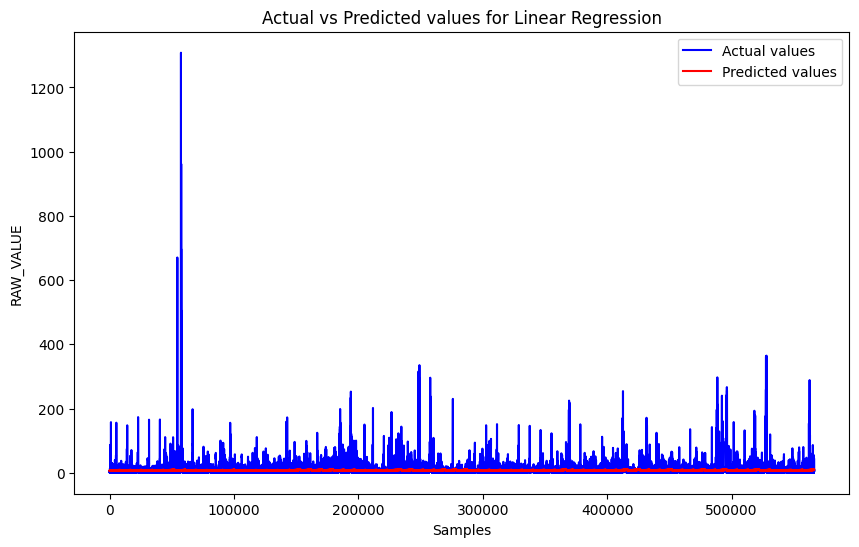

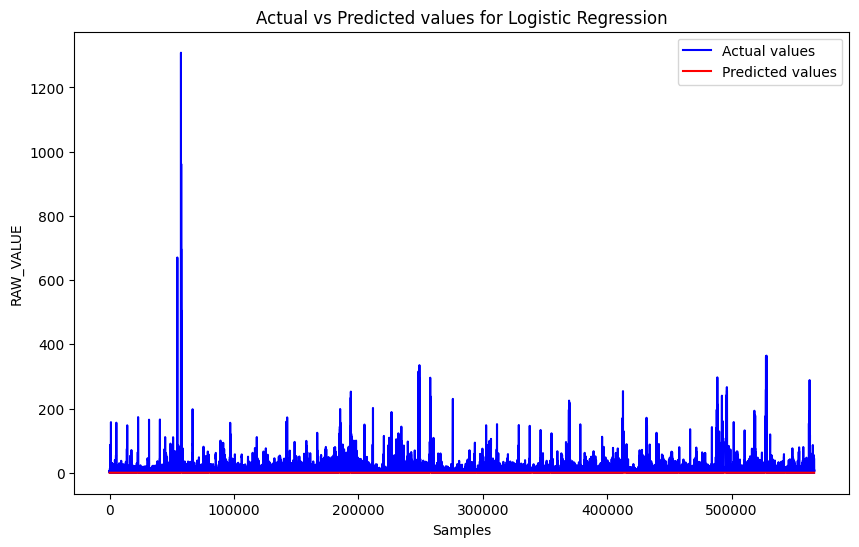

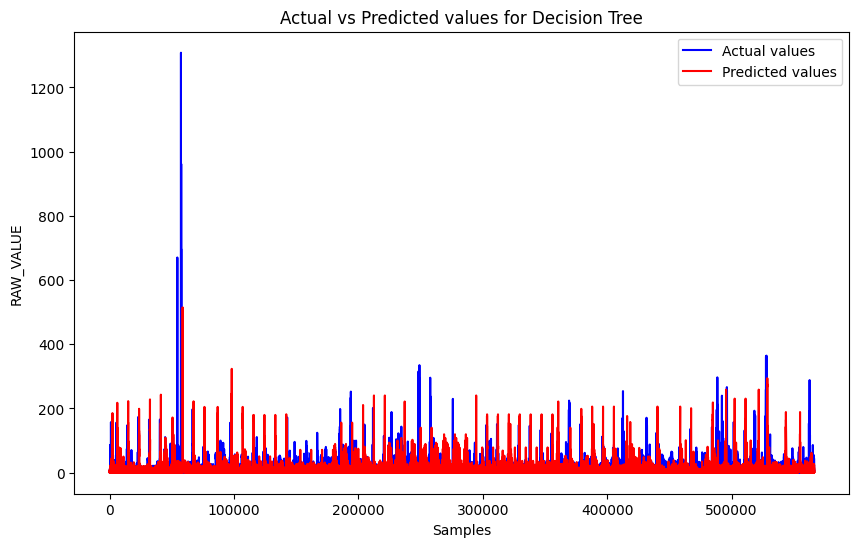

In [14]:
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(np.array(y_test), 'blue', label='Actual values')
    plt.plot(y_pred, 'red', label='Predicted values')
    plt.title(f'Actual vs Predicted values for {model_name}')
    plt.xlabel('Samples')
    plt.ylabel('RAW_VALUE')
    plt.legend()
    plt.show()

plot_predictions(y_test, y_pred_lr, 'Linear Regression')
plot_predictions(y_test, y_pred_logr, 'Logistic Regression')
plot_predictions(y_test, y_pred_dt, 'Decision Tree')


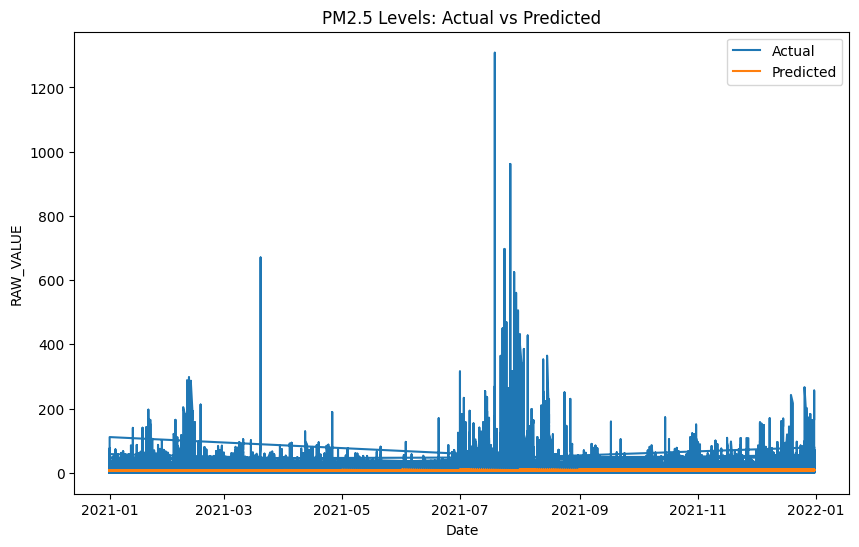

In [15]:
# Linear Regression
PM25_test['PREDICTED_RAW_VALUE'] = y_pred_lr


PM25_train['DATE'] = pd.to_datetime(PM25_train[['YEAR', 'MONTH', 'DAY']])
PM25_test['DATE'] = pd.to_datetime(PM25_test[['YEAR', 'MONTH', 'DAY']])
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(PM25_test['DATE'], PM25_test['RAW_VALUE'], label='Actual')
plt.plot(PM25_test['DATE'], PM25_test['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('PM2.5 Levels: Actual vs Predicted')
plt.legend()
plt.show()

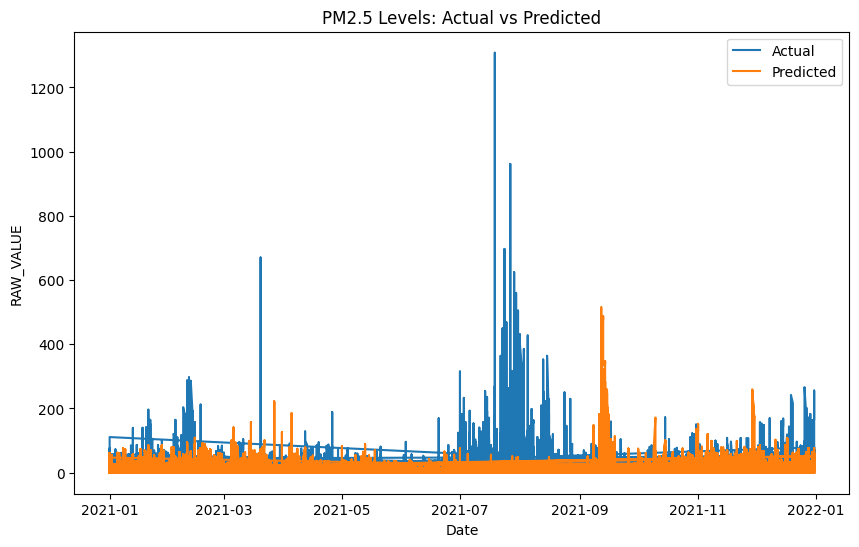

In [16]:
# Decision tree
PM25_test['PREDICTED_RAW_VALUE'] = y_pred_dt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(PM25_test['DATE'], PM25_test['RAW_VALUE'], label='Actual')
plt.plot(PM25_test['DATE'], PM25_test['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('PM2.5 Levels: Actual vs Predicted')
plt.legend()
plt.show()


Ensemble Model - MSE:  208.91626755554765  MAE:  5.408820857638238


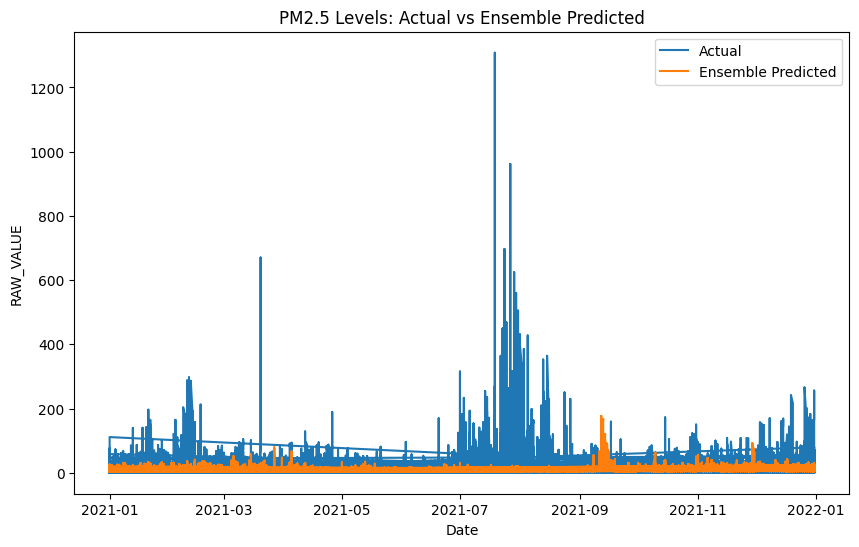

In [17]:
# Ensemble prediction of combining linear regression, decision tree, and gradient boosting method
y_pred_ensemble = (y_pred_lr + y_pred_dt + y_pred_gb) / 3

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)

# Print the error for the ensemble model
print("Ensemble Model - MSE: ", mse_ensemble, " MAE: ", mae_ensemble)

# Plotting - Ensemble Model
plt.figure(figsize=(10, 6))
plt.plot(PM25_test['DATE'], PM25_test['RAW_VALUE'], label='Actual')
plt.plot(PM25_test['DATE'], y_pred_ensemble, label='Ensemble Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('PM2.5 Levels: Actual vs Ensemble Predicted')
plt.legend()
plt.show()

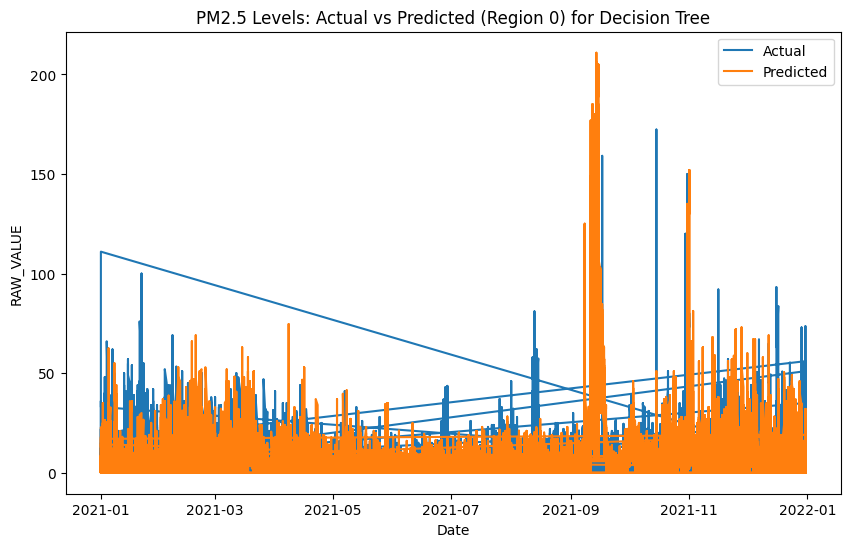

In [18]:
# Filter the DataFrame for region = 0 with decision tree method
PM25_test['PREDICTED_RAW_VALUE'] = y_pred_dt
region_0_data = PM25_test[PM25_test['REGION'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(region_0_data['DATE'], region_0_data['RAW_VALUE'], label='Actual')
plt.plot(region_0_data['DATE'], region_0_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('PM2.5 Levels: Actual vs Predicted (Region 0) for Decision Tree')
plt.legend()
plt.show()

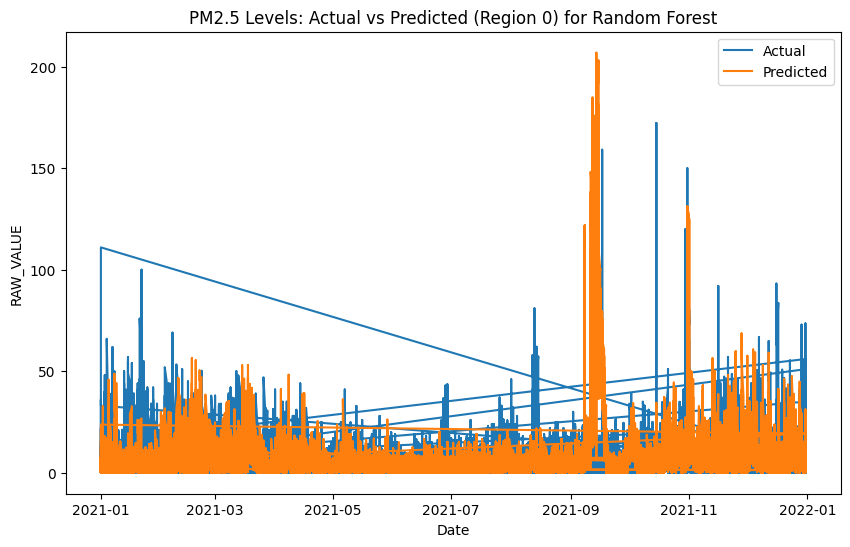

In [19]:
# Filter the DataFrame for region = 0 with random forest method
PM25_test['PREDICTED_RAW_VALUE'] = y_pred_rf
region_0_data = PM25_test[PM25_test['REGION'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(region_0_data['DATE'], region_0_data['RAW_VALUE'], label='Actual')
plt.plot(region_0_data['DATE'], region_0_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('PM2.5 Levels: Actual vs Predicted (Region 0) for Random Forest')
plt.legend()
plt.show()

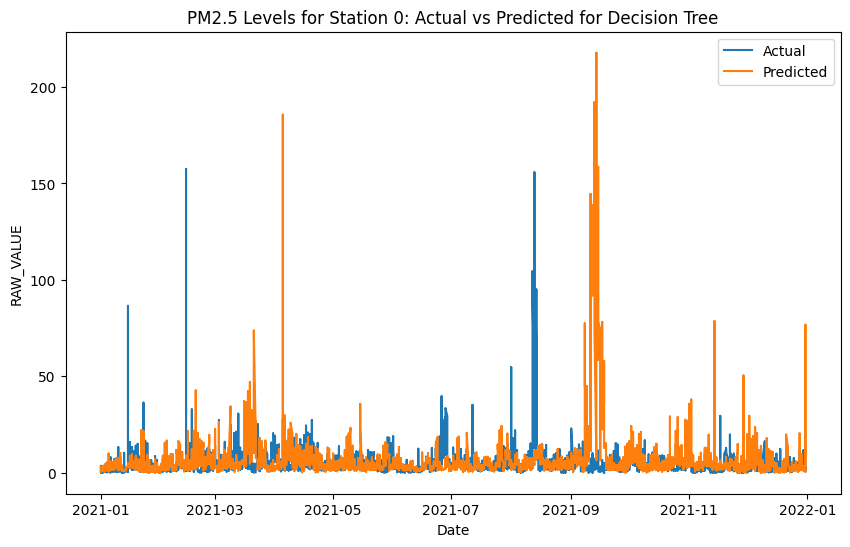

In [20]:
# Filter data for station with name 0 with decision tree
PM25_test['PREDICTED_RAW_VALUE'] = y_pred_dt
filtered_data = PM25_test[PM25_test['STATION_NAME'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['DATE'], filtered_data['RAW_VALUE'], label='Actual')
plt.plot(filtered_data['DATE'], filtered_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title(f'PM2.5 Levels for Station 0: Actual vs Predicted for Decision Tree')
plt.legend()
plt.show()

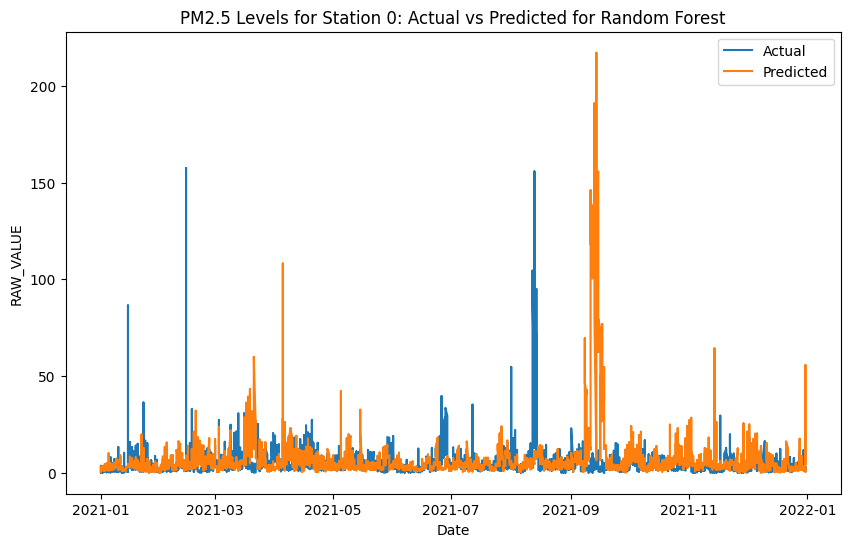

In [21]:
# Filter data for station with name 0 with random forest
PM25_test['PREDICTED_RAW_VALUE'] = y_pred_rf
filtered_data = PM25_test[PM25_test['STATION_NAME'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['DATE'], filtered_data['RAW_VALUE'], label='Actual')
plt.plot(filtered_data['DATE'], filtered_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title(f'PM2.5 Levels for Station 0: Actual vs Predicted for Random Forest')
plt.legend()
plt.show()

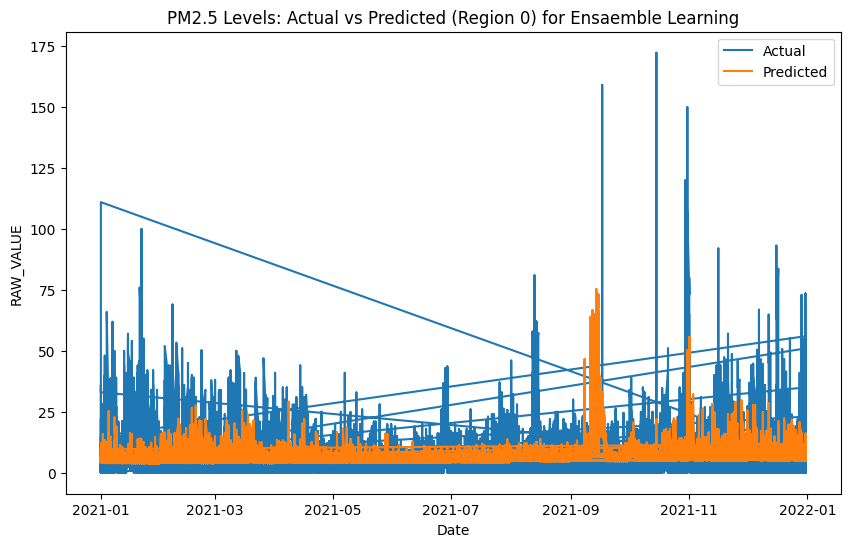

In [22]:
# Filter the DataFrame for region = 0 with ensemble method
PM25_test['PREDICTED_RAW_VALUE'] = y_pred_ensemble
region_0_data = PM25_test[PM25_test['REGION'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(region_0_data['DATE'], region_0_data['RAW_VALUE'], label='Actual')
plt.plot(region_0_data['DATE'], region_0_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('PM2.5 Levels: Actual vs Predicted (Region 0) for Ensaemble Learning')
plt.legend()
plt.show()

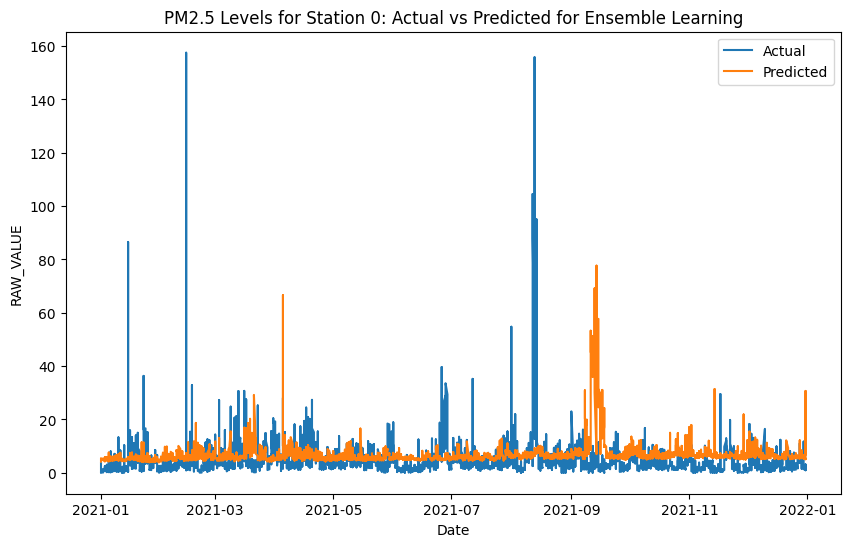

In [23]:
# Filter data for station with name 0 with ensemble method
PM25_test['PREDICTED_RAW_VALUE'] = y_pred_ensemble
filtered_data = PM25_test[PM25_test['STATION_NAME'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['DATE'], filtered_data['RAW_VALUE'], label='Actual')
plt.plot(filtered_data['DATE'], filtered_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title(f'PM2.5 Levels for Station 0: Actual vs Predicted for Ensemble Learning')
plt.legend()
plt.show()

# Data Preprocessing for NO2

In [24]:
import os
import gdown

# Function to check if a file exists locally
def file_exists(file_path):
    return os.path.exists(file_path)

# Gdrive sharing link for NO2 from 2010 to 2020
no2_2010_to_2020_sharing_link = 'https://drive.google.com/file/d/1-4SR7YaIdpZmPWkV5Ry_cSj4nVFsz9VA/view?usp=drive_link'

# Extract the file ID from the sharing link
no2_2010_to_2020_file_id = no2_2010_to_2020_sharing_link.split('/')[-2]

# Define the output file path for NO2 2010 to 2020
output_2010_to_2020 = '/content/no2_2010_to_2020.csv'

# Check if the local file exists
if not file_exists(output_2010_to_2020):
    # Download the CSV file for NO2 2010 to 2020
    url = f'https://drive.google.com/uc?id={no2_2010_to_2020_file_id}'
    gdown.download(url, output_2010_to_2020, quiet=False)
else:
    print("Using local file for NO2 2010 to 2020.")

# For NO2 in 2021
no2_2021_sharing_link = 'https://drive.google.com/file/d/1ZhxSG_HPk44lFyaGfqfvotRiWiXS_2_C/view?usp=drive_link'
no2_2021_file_id = no2_2021_sharing_link.split('/')[-2]

# Define the output file path for NO2 2021
output_2021 = '/content/no2_2021.csv'

# Check if the local file exists
if not file_exists(output_2021):
    # Download the CSV file for NO2 2021
    url = f'https://drive.google.com/uc?id={no2_2021_file_id}'
    gdown.download(url, output_2021, quiet=False)
else:
    print("Using local file for NO2 2021.")


Downloading...
From: https://drive.google.com/uc?id=1-4SR7YaIdpZmPWkV5Ry_cSj4nVFsz9VA
To: /content/no2_2010_to_2020.csv
100%|██████████| 630M/630M [00:03<00:00, 183MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZhxSG_HPk44lFyaGfqfvotRiWiXS_2_C
To: /content/no2_2021.csv
100%|██████████| 75.9M/75.9M [00:00<00:00, 227MB/s]


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime

NO2_train = pd.read_csv('/content/no2_2010_to_2020.csv')
NO2_train.head()

<ipython-input-25-79836a807109>:15: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  NO2_train = pd.read_csv('/content/no2_2010_to_2020.csv')


,DATE_PST,DATE,TIME,STATION_NAME,STATION_NAME_FULL,EMS_ID,NAPS_ID,RAW_VALUE,ROUNDED_VALUE,UNIT,INSTRUMENT,PARAMETER,OWNER,REGION
0,2011-01-01 01:00,2011-01-01,01:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,12.457220,12.5,ppb,NOX_APIT200,NO2,ENV,01 - Vancouver Island
1,2011-01-01 02:00,2011-01-01,02:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,9.672222,9.7,ppb,NOX_APIT200,NO2,ENV,01 - Vancouver Island
2,2011-01-01 03:00,2011-01-01,03:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,8.728333,8.7,ppb,NOX_APIT200,NO2,ENV,01 - Vancouver Island
3,2011-01-01 04:00,2011-01-01,04:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,8.688611,8.7,ppb,NOX_APIT200,NO2,ENV,01 - Vancouver Island
4,2011-01-01 05:00,2011-01-01,05:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,7.658055,7.7,ppb,NOX_APIT200,NO2,ENV,01 - Vancouver Island


In [26]:
NO2_test = pd.read_csv('/content/no2_2021.csv')
NO2_test.head()

,DATE_PST,DATE,TIME,STATION_NAME,STATION_NAME_FULL,EMS_ID,NAPS_ID,RAW_VALUE,ROUNDED_VALUE,UNIT,INSTRUMENT,PARAMETER,OWNER,REGION
0,2021-01-01 01:00,2021-01-01,01:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,13.776090,13.8,ppb,UNSPECIFIED,NO2,MVRD,02 - Lower Mainland
1,2021-01-01 02:00,2021-01-01,02:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,10.800290,10.8,ppb,UNSPECIFIED,NO2,MVRD,02 - Lower Mainland
2,2021-01-01 03:00,2021-01-01,03:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,8.662222,8.7,ppb,UNSPECIFIED,NO2,MVRD,02 - Lower Mainland
3,2021-01-01 04:00,2021-01-01,04:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,4.590218,4.6,ppb,UNSPECIFIED,NO2,MVRD,02 - Lower Mainland
4,2021-01-01 05:00,2021-01-01,05:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,5.399928,5.4,ppb,UNSPECIFIED,NO2,MVRD,02 - Lower Mainland


# Data Mining for NO2

In [27]:
def train_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [28]:
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae

In [29]:
NO2_train['RAW_VALUE'].mean()

8.251593251370254

In [30]:
def preprocess_data(df):
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['YEAR'] = df['DATE'].dt.year
    df['MONTH'] = df['DATE'].dt.month
    df['DAY'] = df['DATE'].dt.day
    df['HOUR'] = df['TIME'].apply(lambda x: int(x.split(':')[0]))
    df = df.drop(['DATE', 'DATE_PST', 'TIME','ROUNDED_VALUE'], axis=1)

    # Encoding categorical columns
    le = LabelEncoder()
    df['REGION'] = le.fit_transform(df['REGION'])
    df['STATION_NAME'] = le.fit_transform(df['STATION_NAME'])
    df = df.drop(['STATION_NAME_FULL', 'NAPS_ID', 'UNIT', 'INSTRUMENT', 'OWNER', 'EMS_ID', 'PARAMETER'], axis=1)

    # Fill NaNs with column mean
    df = df.fillna(df.mean())

    return df

In [31]:
NO2_train = preprocess_data(NO2_train)
NO2_test = preprocess_data(NO2_test)
NO2_train.head(10)

,STATION_NAME,RAW_VALUE,REGION,YEAR,MONTH,DAY,HOUR
0,80,12.457220,0,2011,1,1,1
1,80,9.672222,0,2011,1,1,2
2,80,8.728333,0,2011,1,1,3
3,80,8.688611,0,2011,1,1,4
4,80,7.658055,0,2011,1,1,5
5,80,5.814722,0,2011,1,1,6
6,80,10.240280,0,2011,1,1,7
7,80,8.695278,0,2011,1,1,8
8,80,10.948060,0,2011,1,1,9
9,80,19.246940,0,2011,1,1,10


In [32]:
X_train = NO2_train.drop('RAW_VALUE', axis=1)
y_train = NO2_train['RAW_VALUE']

X_test = NO2_test.drop('RAW_VALUE', axis=1)
y_test = NO2_test['RAW_VALUE']

In [33]:
# Linear Regression
lr = LinearRegression()
y_pred_lr = train_and_predict(lr, X_train, y_train, X_test)
mse_lr, mae_lr = evaluate_model(y_test, y_pred_lr)

# Convert y to a binary variable
# For example, let's say we want to predict whether RAW_VALUE is above mean value
threshold = NO2_train['RAW_VALUE'].mean()
y_train_log = (y_train > threshold).astype(int)
y_test_log = (y_test > threshold).astype(int)


# Logistic Regression
X_train_log = X_train
logr = LogisticRegression()
logr.fit(X_train_log, y_train_log)

# Make predictions
X_test_log = X_test
y_pred_logr = logr.predict(X_test_log)

mse_logr, mae_logr = evaluate_model(y_test, y_pred_logr)
accuracy_logr = accuracy_score(y_test_log, y_pred_logr)

# Decision Tree
dt = DecisionTreeRegressor()
y_pred_dt = train_and_predict(dt, X_train, y_train, X_test)

mse_dt, mae_dt = evaluate_model(y_test, y_pred_dt)

# Random Forest
rf = RandomForestRegressor(n_estimators=10, random_state=42)
y_pred_rf = train_and_predict(rf, X_train, y_train, X_test)
mse_rf, mae_rf = evaluate_model(y_test, y_pred_rf)

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=25, learning_rate=0.1, max_depth=1, random_state=42)
y_pred_gb = train_and_predict(gb, X_train, y_train, X_test)
mse_gb, mae_gb = evaluate_model(y_test, y_pred_gb)


# Data Evaluating  for NO2

In [47]:
# Finally, we can print the errors:
print("Linear Regression - MSE: ", mse_lr, " MAE: ", mae_lr)
# lr.coef_ will give you the coefficients of the independent variables (slopes if multiple variables)
# and lr.intercept_ will give you the constant term (intercept)
print('Linear Regression Coefficients: ', lr.coef_)
print('Linear Regression Intercept: ', lr.intercept_)
print("Logistic Regression - Accuracy: ", accuracy_logr)
print("Logistic Regression - MSE: ", mse_logr, " MAE: ", mae_logr)
print("Decision Tree - MSE: ", mse_dt, " MAE: ", mae_dt)
print("Random Forest - MSE: ", mse_rf, " MAE: ", mae_rf)
print("Gradient Boosting - MSE: ", mse_gb, " MAE: ", mae_gb)

Linear Regression - MSE:  39.35465793558841  MAE:  4.698499431208333
Linear Regression Coefficients:  [ 0.03421592 -0.51486128 -0.05093445 -0.04161687 -0.00686398  0.06135829]
Linear Regression Intercept:  109.94081605975205
Logistic Regression - Accuracy:  0.6959558848527568
Logistic Regression - MSE:  92.7765967377547  MAE:  7.180035910250581
Decision Tree - MSE:  58.7759705451115  MAE:  5.33862556421775
Random Forest - MSE:  53.39674772090857  MAE:  5.058481484833316
Gradient Boosting - MSE:  38.98554062942573  MAE:  4.836476993889317


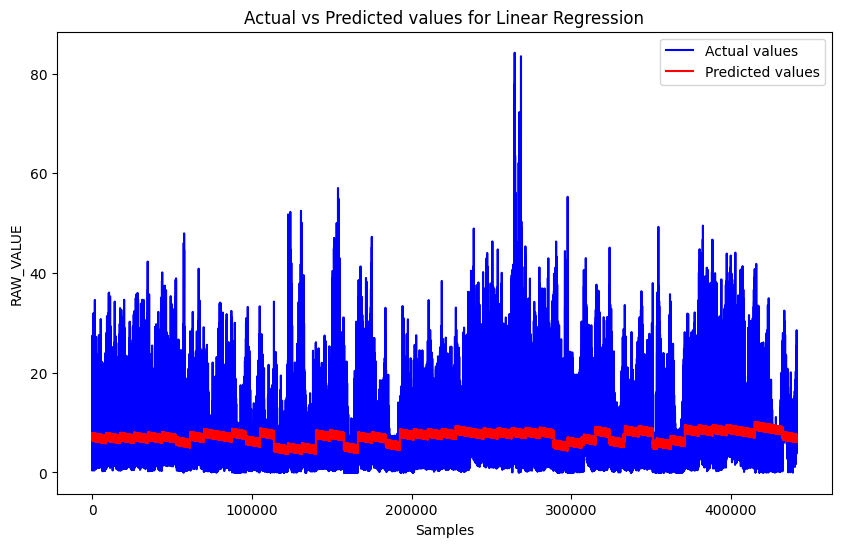

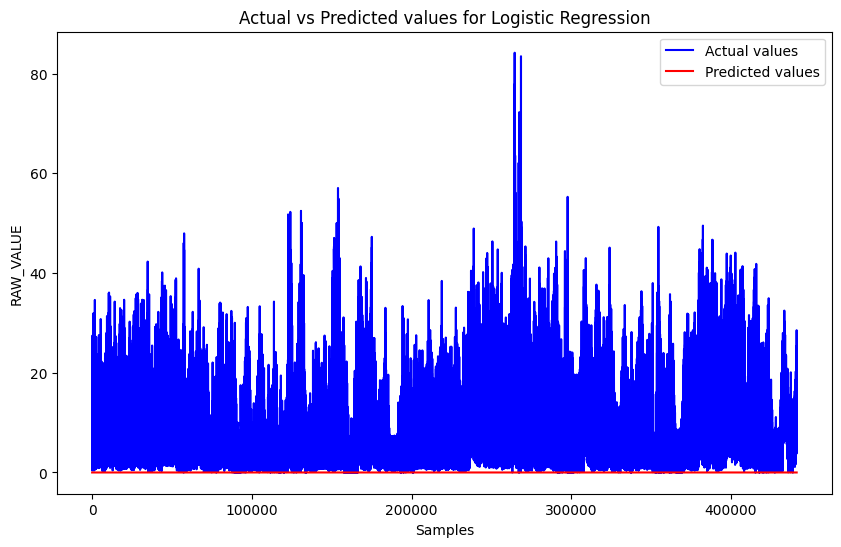

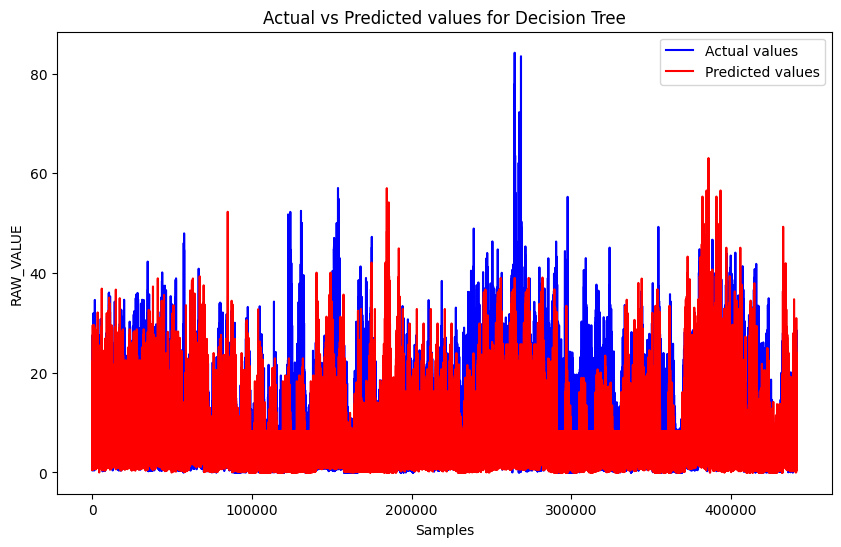

In [35]:
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(np.array(y_test), 'blue', label='Actual values')
    plt.plot(y_pred, 'red', label='Predicted values')
    plt.title(f'Actual vs Predicted values for {model_name}')
    plt.xlabel('Samples')
    plt.ylabel('RAW_VALUE')
    plt.legend()
    plt.show()

plot_predictions(y_test, y_pred_lr, 'Linear Regression')
plot_predictions(y_test, y_pred_logr, 'Logistic Regression')
plot_predictions(y_test, y_pred_dt, 'Decision Tree')


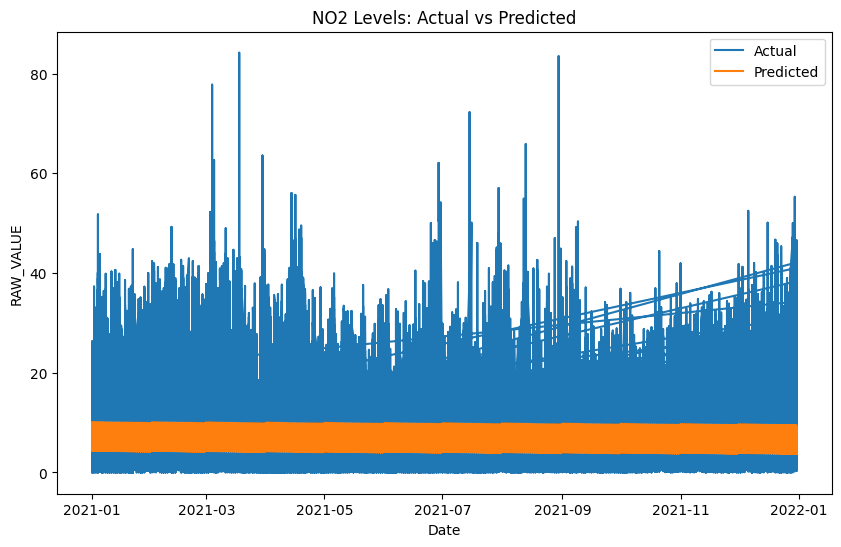

In [36]:
# Linear Regression
NO2_test['PREDICTED_RAW_VALUE'] = y_pred_lr


NO2_train['DATE'] = pd.to_datetime(NO2_train[['YEAR', 'MONTH', 'DAY']])
NO2_test['DATE'] = pd.to_datetime(NO2_test[['YEAR', 'MONTH', 'DAY']])
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(NO2_test['DATE'], NO2_test['RAW_VALUE'], label='Actual')
plt.plot(NO2_test['DATE'], NO2_test['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('NO2 Levels: Actual vs Predicted')
plt.legend()
plt.show()

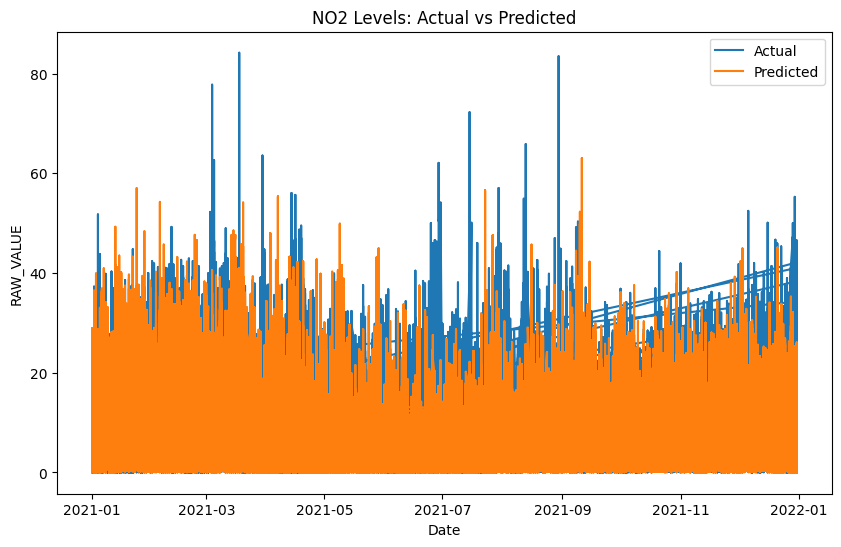

In [37]:
# Decision tree
NO2_test['PREDICTED_RAW_VALUE'] = y_pred_dt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(NO2_test['DATE'], NO2_test['RAW_VALUE'], label='Actual')
plt.plot(NO2_test['DATE'], NO2_test['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('NO2 Levels: Actual vs Predicted')
plt.legend()
plt.show()


Ensemble Model - MSE:  38.595148457480896  MAE:  4.529234908124331


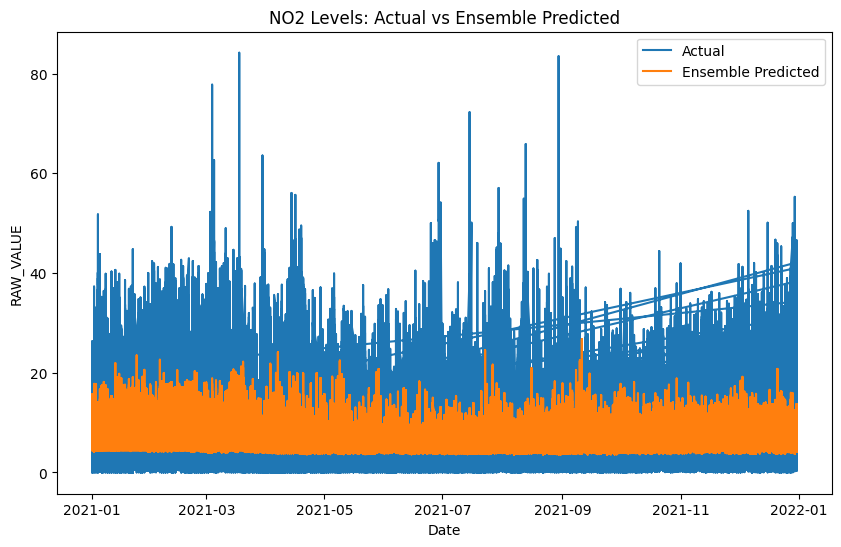

In [38]:
# Ensemble prediction of combining linear regression, decision tree, and gradient boosting method
y_pred_ensemble = (y_pred_lr + y_pred_dt + y_pred_gb) / 3

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)

# Print the error for the ensemble model
print("Ensemble Model - MSE: ", mse_ensemble, " MAE: ", mae_ensemble)

# Plotting - Ensemble Model
plt.figure(figsize=(10, 6))
plt.plot(NO2_test['DATE'], NO2_test['RAW_VALUE'], label='Actual')
plt.plot(NO2_test['DATE'], y_pred_ensemble, label='Ensemble Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('NO2 Levels: Actual vs Ensemble Predicted')
plt.legend()
plt.show()

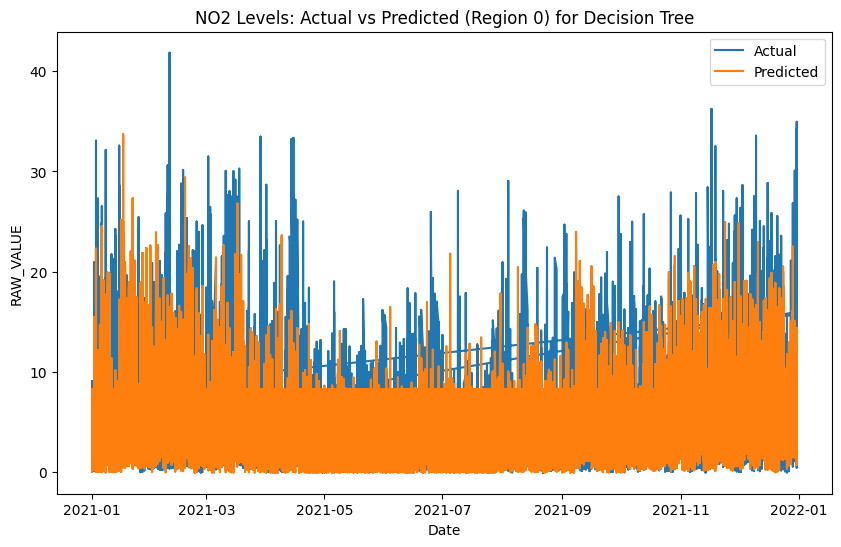

In [39]:
# Filter the DataFrame for region = 0 with decision tree method
NO2_test['PREDICTED_RAW_VALUE'] = y_pred_dt
region_0_data = NO2_test[NO2_test['REGION'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(region_0_data['DATE'], region_0_data['RAW_VALUE'], label='Actual')
plt.plot(region_0_data['DATE'], region_0_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('NO2 Levels: Actual vs Predicted (Region 0) for Decision Tree')
plt.legend()
plt.show()

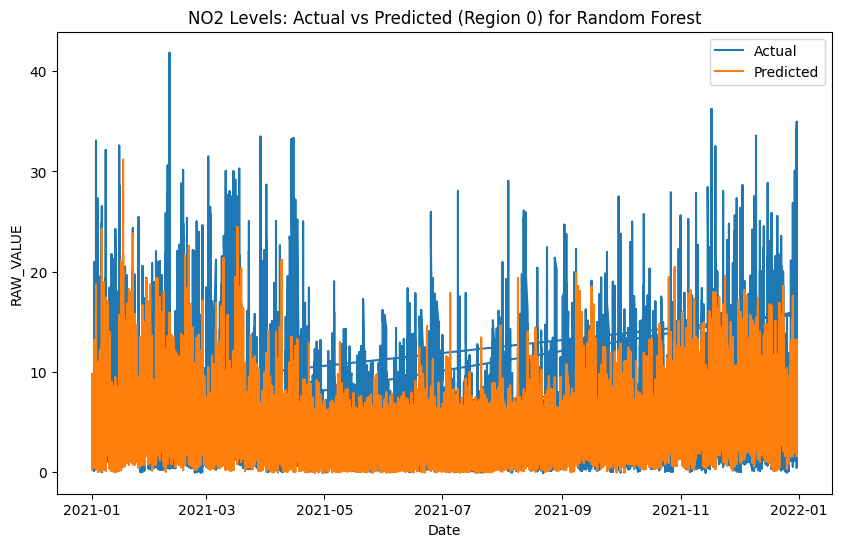

In [40]:
# Filter the DataFrame for region = 0 with random forest method
NO2_test['PREDICTED_RAW_VALUE'] = y_pred_rf
region_0_data = NO2_test[NO2_test['REGION'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(region_0_data['DATE'], region_0_data['RAW_VALUE'], label='Actual')
plt.plot(region_0_data['DATE'], region_0_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('NO2 Levels: Actual vs Predicted (Region 0) for Random Forest')
plt.legend()
plt.show()

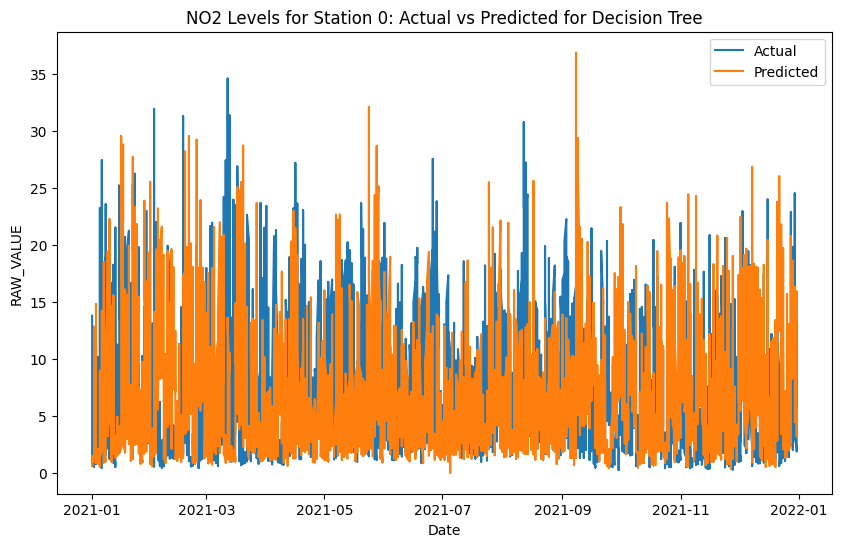

In [41]:
# Filter data for station with name 0 with decision tree
NO2_test['PREDICTED_RAW_VALUE'] = y_pred_dt
filtered_data = NO2_test[NO2_test['STATION_NAME'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['DATE'], filtered_data['RAW_VALUE'], label='Actual')
plt.plot(filtered_data['DATE'], filtered_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title(f'NO2 Levels for Station 0: Actual vs Predicted for Decision Tree')
plt.legend()
plt.show()

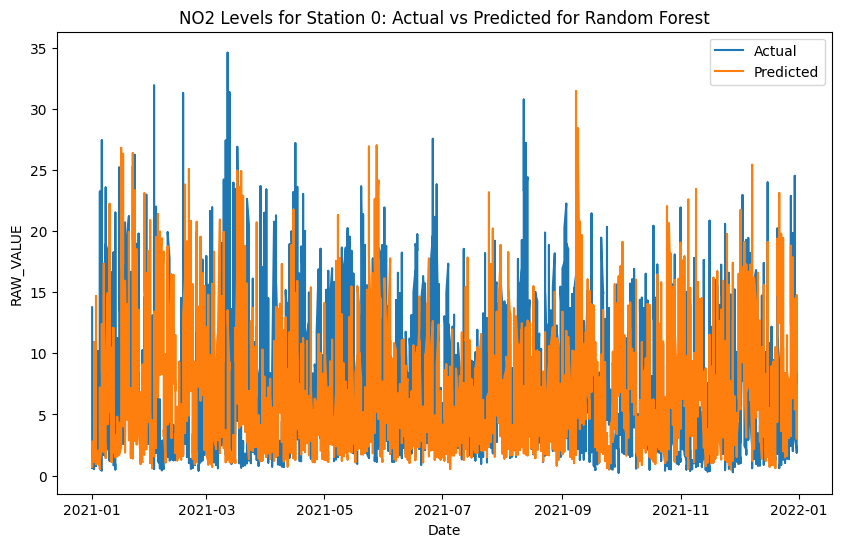

In [42]:
# Filter data for station with name 0 with random forest
NO2_test['PREDICTED_RAW_VALUE'] = y_pred_rf
filtered_data = NO2_test[NO2_test['STATION_NAME'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['DATE'], filtered_data['RAW_VALUE'], label='Actual')
plt.plot(filtered_data['DATE'], filtered_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title(f'NO2 Levels for Station 0: Actual vs Predicted for Random Forest')
plt.legend()
plt.show()

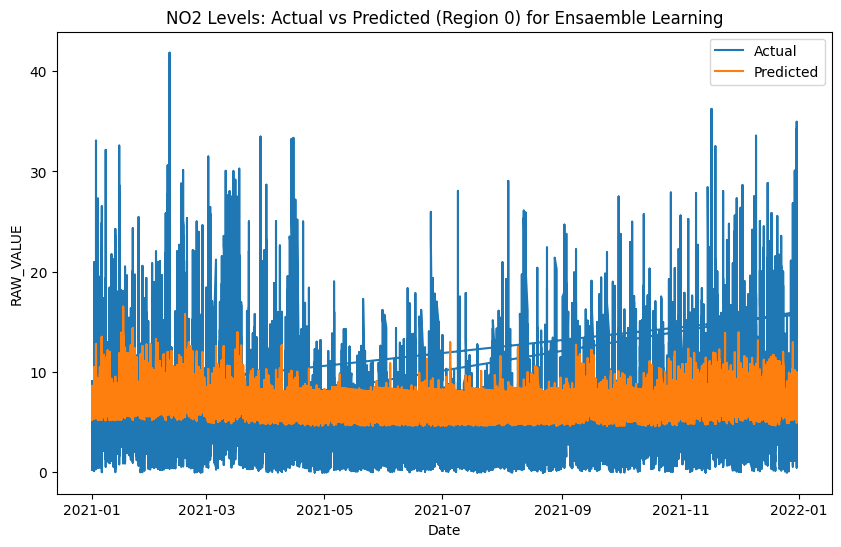

In [43]:
# Filter the DataFrame for region = 0 with ensemble method
NO2_test['PREDICTED_RAW_VALUE'] = y_pred_ensemble
region_0_data = NO2_test[NO2_test['REGION'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(region_0_data['DATE'], region_0_data['RAW_VALUE'], label='Actual')
plt.plot(region_0_data['DATE'], region_0_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('NO2 Levels: Actual vs Predicted (Region 0) for Ensaemble Learning')
plt.legend()
plt.show()

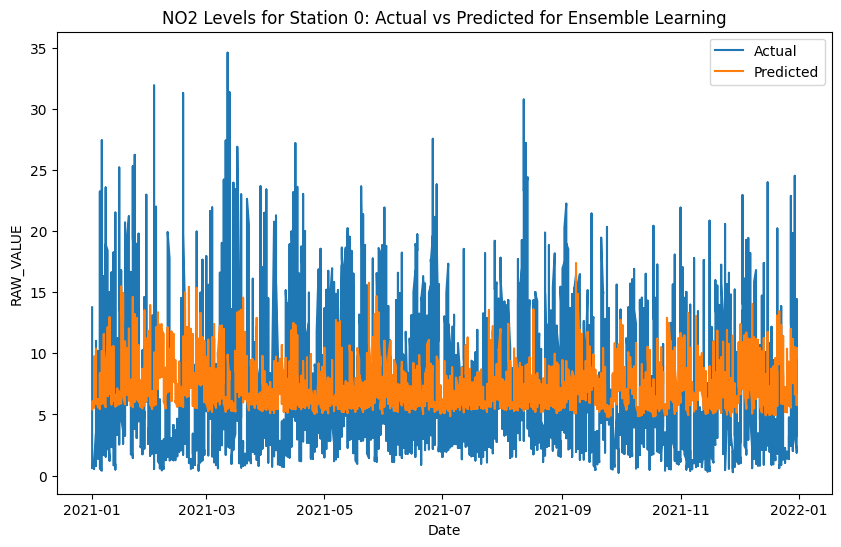

In [44]:
# Filter data for station with name 0 with ensemble method
NO2_test['PREDICTED_RAW_VALUE'] = y_pred_ensemble
filtered_data = NO2_test[NO2_test['STATION_NAME'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['DATE'], filtered_data['RAW_VALUE'], label='Actual')
plt.plot(filtered_data['DATE'], filtered_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title(f'NO2 Levels for Station 0: Actual vs Predicted for Ensemble Learning')
plt.legend()
plt.show()

# Data Preprocessing for O3

In [45]:
import os
import gdown

# Function to check if a file exists locally
def file_exists(file_path):
    return os.path.exists(file_path)

# Gdrive sharing link for O3 from 2010 to 2020
o3_2010_to_2020_sharing_link = 'https://drive.google.com/file/d/1-D-n4p6Do_heY2rns3bAdiRSACBq_xPp/view?usp=drive_link'

# Extract the file ID from the sharing link
o3_2010_to_2020_file_id = o3_2010_to_2020_sharing_link.split('/')[-2]

# Define the output file path for o3 2010 to 2020
output_2010_to_2020 = '/content/o3_2010_to_2020.csv'

# Check if the local file exists
if not file_exists(output_2010_to_2020):
    # Download the CSV file for o3 2010 to 2020
    url = f'https://drive.google.com/uc?id={o3_2010_to_2020_file_id}'
    gdown.download(url, output_2010_to_2020, quiet=False)
else:
    print("Using local file for o3 2010 to 2020.")

# For o3 in 2021
o3_2021_sharing_link = 'https://drive.google.com/file/d/1vfaeo6amLvQuSVp7MiZNHh8j6FNUN9BC/view?usp=drive_link'
o3_2021_file_id = o3_2021_sharing_link.split('/')[-2]

# Define the output file path for o3 2021
output_2021 = '/content/o3_2021.csv'

# Check if the local file exists
if not file_exists(output_2021):
    # Download the CSV file for o3 2021
    url = f'https://drive.google.com/uc?id={o3_2021_file_id}'
    gdown.download(url, output_2021, quiet=False)
else:
    print("Using local file for o3 2021.")


Downloading...
From: https://drive.google.com/uc?id=1-D-n4p6Do_heY2rns3bAdiRSACBq_xPp
To: /content/o3_2010_to_2020.csv
100%|██████████| 584M/584M [00:03<00:00, 156MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vfaeo6amLvQuSVp7MiZNHh8j6FNUN9BC
To: /content/o3_2021.csv
100%|██████████| 69.0M/69.0M [00:00<00:00, 249MB/s]


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime

O3_train = pd.read_csv('/content/o3_2010_to_2020.csv')
O3_train.head()

,DATE_PST,DATE,TIME,STATION_NAME,STATION_NAME_FULL,EMS_ID,NAPS_ID,RAW_VALUE,ROUNDED_VALUE,UNIT,INSTRUMENT,PARAMETER,OWNER,REGION
0,2011-01-01 01:00,2011-01-01,01:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,6.510277,6.5,ppb,O3_APIT400,O3,ENV,01 - Vancouver Island
1,2011-01-01 02:00,2011-01-01,02:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,9.037500,9.0,ppb,O3_APIT400,O3,ENV,01 - Vancouver Island
2,2011-01-01 03:00,2011-01-01,03:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,9.169444,9.2,ppb,O3_APIT400,O3,ENV,01 - Vancouver Island
3,2011-01-01 04:00,2011-01-01,04:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,10.889170,10.9,ppb,O3_APIT400,O3,ENV,01 - Vancouver Island
4,2011-01-01 05:00,2011-01-01,05:00,Victoria Topaz,VICTORIA TOPAZ,E231866,100304,8.682777,8.7,ppb,O3_APIT400,O3,ENV,01 - Vancouver Island


In [49]:
O3_test = pd.read_csv('/content/o3_2021.csv')
O3_test.head()

,DATE_PST,DATE,TIME,STATION_NAME,STATION_NAME_FULL,EMS_ID,NAPS_ID,RAW_VALUE,ROUNDED_VALUE,UNIT,INSTRUMENT,PARAMETER,OWNER,REGION
0,2021-01-01 01:00,2021-01-01,01:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,1.759062,1.8,ppb,UNSPECIFIED,O3,MVRD,02 - Lower Mainland
1,2021-01-01 02:00,2021-01-01,02:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,3.031612,3.0,ppb,UNSPECIFIED,O3,MVRD,02 - Lower Mainland
2,2021-01-01 03:00,2021-01-01,03:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,7.680164,7.7,ppb,UNSPECIFIED,O3,MVRD,02 - Lower Mainland
3,2021-01-01 04:00,2021-01-01,04:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,12.112130,12.1,ppb,UNSPECIFIED,O3,MVRD,02 - Lower Mainland
4,2021-01-01 05:00,2021-01-01,05:00,Abbotsford A Columbia Street,ABBOTSFORD A COLUMBIA STREET,E289309,10,10.559730,10.6,ppb,UNSPECIFIED,O3,MVRD,02 - Lower Mainland


# Data Mining for O3

In [50]:
def train_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [51]:
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae

In [52]:
O3_train['RAW_VALUE'].mean()

19.037572910587468

In [53]:
def preprocess_data(df):
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['YEAR'] = df['DATE'].dt.year
    df['MONTH'] = df['DATE'].dt.month
    df['DAY'] = df['DATE'].dt.day
    df['HOUR'] = df['TIME'].apply(lambda x: int(x.split(':')[0]))
    df = df.drop(['DATE', 'DATE_PST', 'TIME','ROUNDED_VALUE'], axis=1)

    # Encoding categorical columns
    le = LabelEncoder()
    df['REGION'] = le.fit_transform(df['REGION'])
    df['STATION_NAME'] = le.fit_transform(df['STATION_NAME'])
    df = df.drop(['STATION_NAME_FULL', 'NAPS_ID', 'UNIT', 'INSTRUMENT', 'OWNER', 'EMS_ID', 'PARAMETER'], axis=1)

    # Fill NaNs with column mean
    df = df.fillna(df.mean())

    return df

In [54]:
O3_train = preprocess_data(O3_train)
O3_test = preprocess_data(O3_test)
O3_train.head(10)

,STATION_NAME,RAW_VALUE,REGION,YEAR,MONTH,DAY,HOUR
0,70,6.510277,0,2011,1,1,1
1,70,9.037500,0,2011,1,1,2
2,70,9.169444,0,2011,1,1,3
3,70,10.889170,0,2011,1,1,4
4,70,8.682777,0,2011,1,1,5
5,70,8.751944,0,2011,1,1,6
6,70,4.261944,0,2011,1,1,7
7,70,4.478333,0,2011,1,1,8
8,70,4.578610,0,2011,1,1,9
9,70,4.431388,0,2011,1,1,10


In [55]:
X_train = O3_train.drop('RAW_VALUE', axis=1)
y_train = O3_train['RAW_VALUE']

X_test = O3_test.drop('RAW_VALUE', axis=1)
y_test = O3_test['RAW_VALUE']

In [56]:
# Linear Regression
lr = LinearRegression()
y_pred_lr = train_and_predict(lr, X_train, y_train, X_test)
mse_lr, mae_lr = evaluate_model(y_test, y_pred_lr)

# Convert y to a binary variable
# For example, let's say we want to predict whether RAW_VALUE is above mean value
threshold = O3_train['RAW_VALUE'].mean()
y_train_log = (y_train > threshold).astype(int)
y_test_log = (y_test > threshold).astype(int)


# Logistic Regression
X_train_log = X_train
logr = LogisticRegression()
logr.fit(X_train_log, y_train_log)

# Make predictions
X_test_log = X_test
y_pred_logr = logr.predict(X_test_log)

mse_logr, mae_logr = evaluate_model(y_test, y_pred_logr)
accuracy_logr = accuracy_score(y_test_log, y_pred_logr)

# Decision Tree
dt = DecisionTreeRegressor()
y_pred_dt = train_and_predict(dt, X_train, y_train, X_test)

mse_dt, mae_dt = evaluate_model(y_test, y_pred_dt)

# Random Forest
rf = RandomForestRegressor(n_estimators=10, random_state=42)
y_pred_rf = train_and_predict(rf, X_train, y_train, X_test)
mse_rf, mae_rf = evaluate_model(y_test, y_pred_rf)

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=25, learning_rate=0.1, max_depth=1, random_state=42)
y_pred_gb = train_and_predict(gb, X_train, y_train, X_test)
mse_gb, mae_gb = evaluate_model(y_test, y_pred_gb)


# Data Evaluating for O3

In [57]:
# Finally, we can print the errors:
print("Linear Regression - MSE: ", mse_lr, " MAE: ", mae_lr)
# lr.coef_ will give you the coefficients of the independent variables (slopes if multiple variables)
# and lr.intercept_ will give you the constant term (intercept)
print('Linear Regression Coefficients: ', lr.coef_)
print('Linear Regression Intercept: ', lr.intercept_)
print("Logistic Regression - Accuracy: ", accuracy_logr)
print("Logistic Regression - MSE: ", mse_logr, " MAE: ", mae_logr)
print("Decision Tree - MSE: ", mse_dt, " MAE: ", mae_dt)
print("Random Forest - MSE: ", mse_rf, " MAE: ", mae_rf)
print("Gradient Boosting - MSE: ", mse_gb, " MAE: ", mae_gb)

Linear Regression - MSE:  132.70040085040637  MAE:  9.436663476077307
Linear Regression Coefficients:  [-3.73495149e-02  4.81627724e-01 -2.88279859e-02 -7.29025865e-01
 -3.13785103e-04  2.78802328e-01]
Linear Regression Intercept:  78.95123508256543
Logistic Regression - Accuracy:  0.617693835993123
Logistic Regression - MSE:  547.299298735277  MAE:  20.304708075577203
Decision Tree - MSE:  184.05241126950096  MAE:  10.683297089363382
Random Forest - MSE:  161.03279006882318  MAE:  9.986897370301937
Gradient Boosting - MSE:  122.22777751050681  MAE:  9.08002279849721


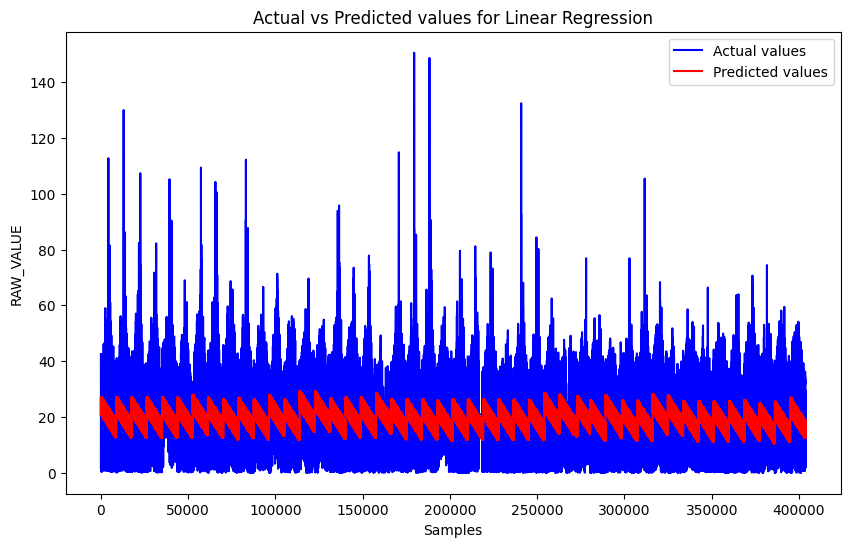

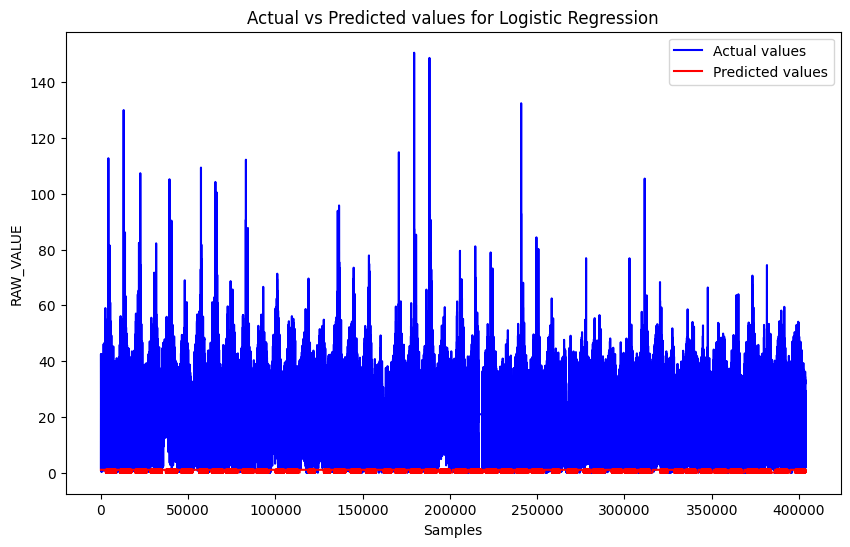

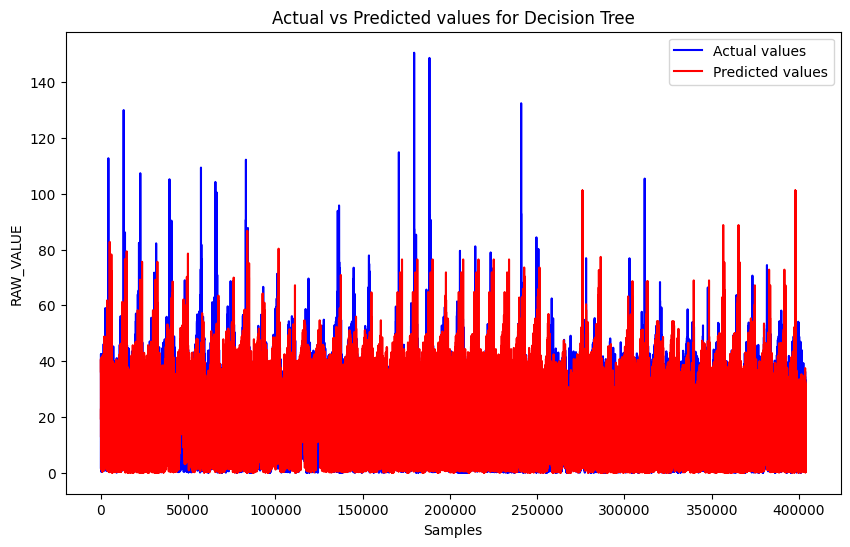

In [58]:
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(np.array(y_test), 'blue', label='Actual values')
    plt.plot(y_pred, 'red', label='Predicted values')
    plt.title(f'Actual vs Predicted values for {model_name}')
    plt.xlabel('Samples')
    plt.ylabel('RAW_VALUE')
    plt.legend()
    plt.show()

plot_predictions(y_test, y_pred_lr, 'Linear Regression')
plot_predictions(y_test, y_pred_logr, 'Logistic Regression')
plot_predictions(y_test, y_pred_dt, 'Decision Tree')


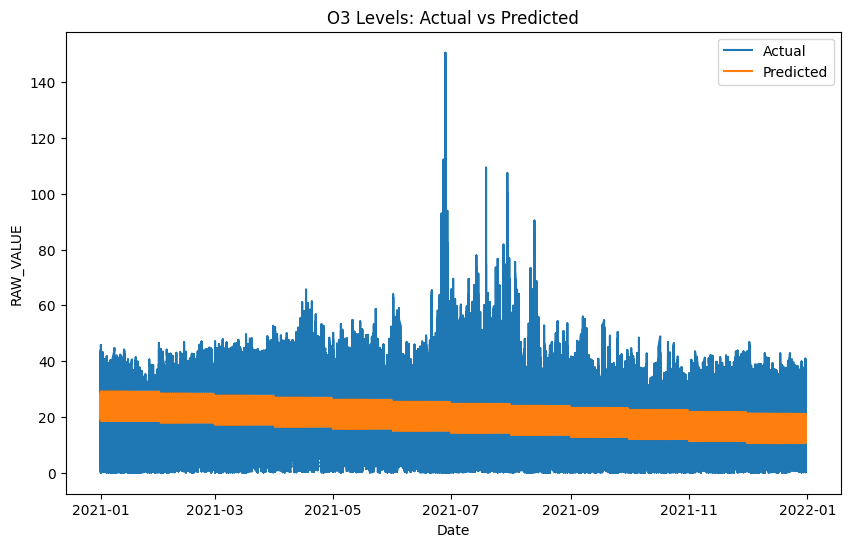

In [59]:
# Linear Regression
O3_test['PREDICTED_RAW_VALUE'] = y_pred_lr


O3_train['DATE'] = pd.to_datetime(O3_train[['YEAR', 'MONTH', 'DAY']])
O3_test['DATE'] = pd.to_datetime(O3_test[['YEAR', 'MONTH', 'DAY']])
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(O3_test['DATE'], O3_test['RAW_VALUE'], label='Actual')
plt.plot(O3_test['DATE'], O3_test['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('O3 Levels: Actual vs Predicted')
plt.legend()
plt.show()

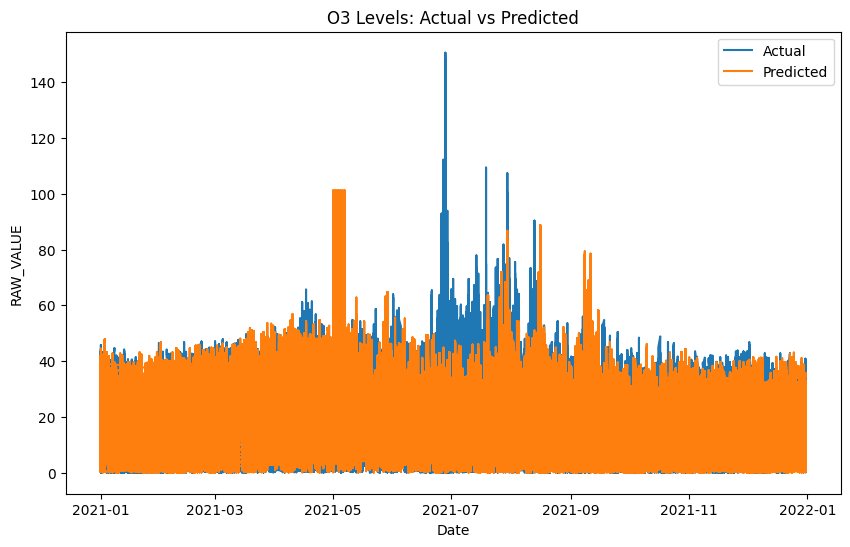

In [60]:
# Decision tree
O3_test['PREDICTED_RAW_VALUE'] = y_pred_dt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(O3_test['DATE'], O3_test['RAW_VALUE'], label='Actual')
plt.plot(O3_test['DATE'], O3_test['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('O3 Levels: Actual vs Predicted')
plt.legend()
plt.show()


Ensemble Model - MSE:  119.73462522989942  MAE:  8.902344937230708


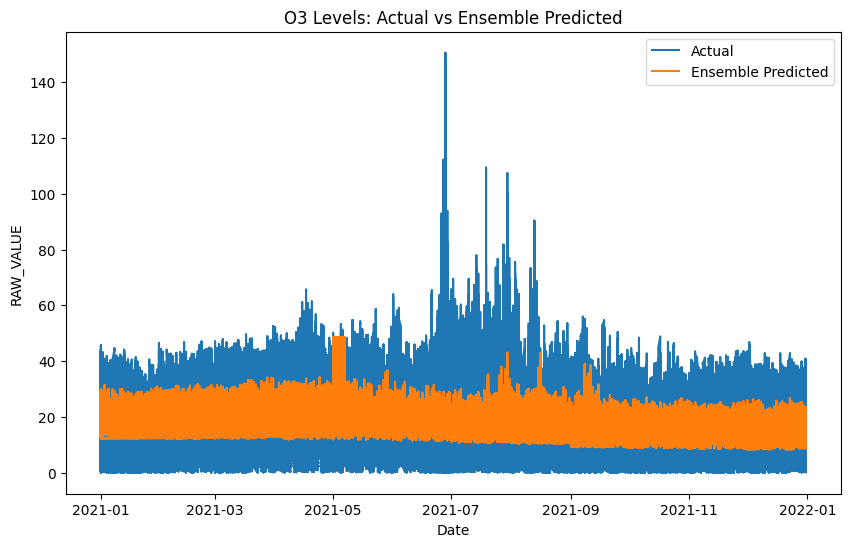

In [61]:
# Ensemble prediction of combining linear regression, decision tree, and gradient boosting method
y_pred_ensemble = (y_pred_lr + y_pred_dt + y_pred_gb) / 3

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)

# Print the error for the ensemble model
print("Ensemble Model - MSE: ", mse_ensemble, " MAE: ", mae_ensemble)

# Plotting - Ensemble Model
plt.figure(figsize=(10, 6))
plt.plot(O3_test['DATE'], O3_test['RAW_VALUE'], label='Actual')
plt.plot(O3_test['DATE'], y_pred_ensemble, label='Ensemble Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('O3 Levels: Actual vs Ensemble Predicted')
plt.legend()
plt.show()

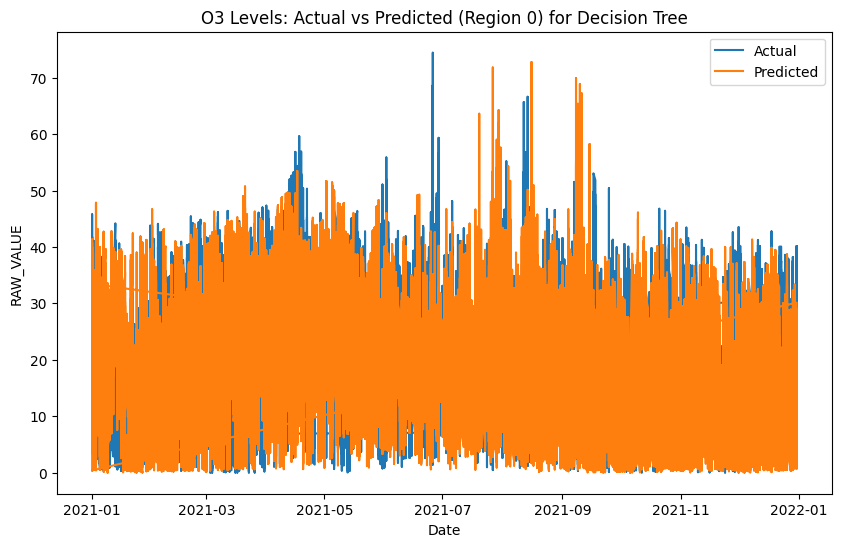

In [62]:
# Filter the DataFrame for region = 0 with decision tree method
O3_test['PREDICTED_RAW_VALUE'] = y_pred_dt
region_0_data = O3_test[O3_test['REGION'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(region_0_data['DATE'], region_0_data['RAW_VALUE'], label='Actual')
plt.plot(region_0_data['DATE'], region_0_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('O3 Levels: Actual vs Predicted (Region 0) for Decision Tree')
plt.legend()
plt.show()

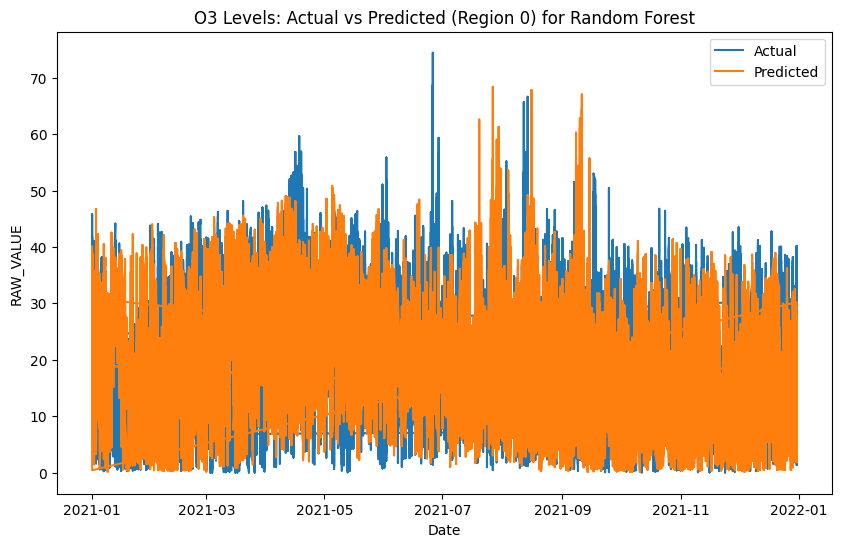

In [63]:
# Filter the DataFrame for region = 0 with random forest method
O3_test['PREDICTED_RAW_VALUE'] = y_pred_rf
region_0_data = O3_test[O3_test['REGION'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(region_0_data['DATE'], region_0_data['RAW_VALUE'], label='Actual')
plt.plot(region_0_data['DATE'], region_0_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('O3 Levels: Actual vs Predicted (Region 0) for Random Forest')
plt.legend()
plt.show()

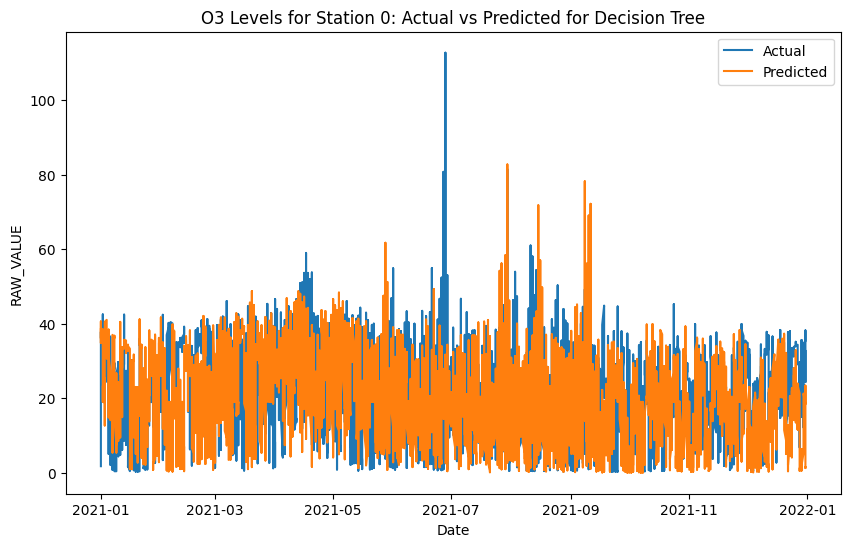

In [64]:
# Filter data for station with name 0 with decision tree
O3_test['PREDICTED_RAW_VALUE'] = y_pred_dt
filtered_data = O3_test[O3_test['STATION_NAME'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['DATE'], filtered_data['RAW_VALUE'], label='Actual')
plt.plot(filtered_data['DATE'], filtered_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title(f'O3 Levels for Station 0: Actual vs Predicted for Decision Tree')
plt.legend()
plt.show()

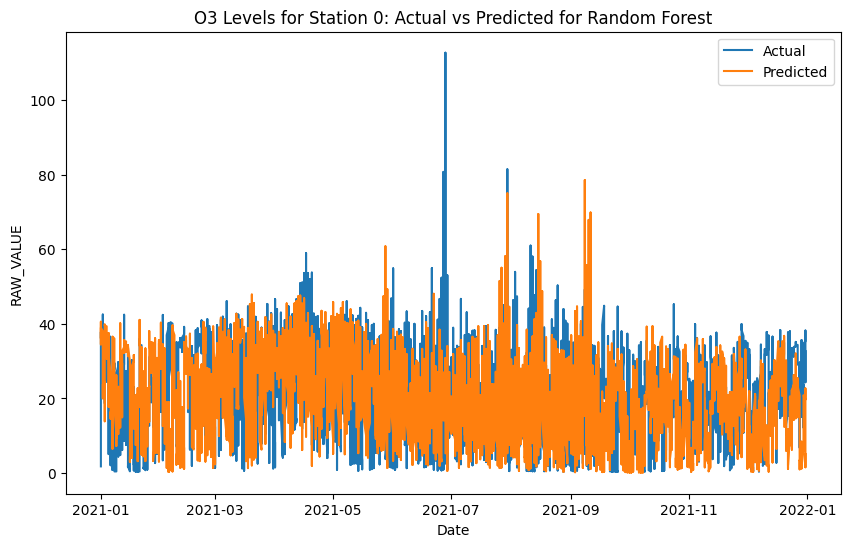

In [65]:
# Filter data for station with name 0 with random forest
O3_test['PREDICTED_RAW_VALUE'] = y_pred_rf
filtered_data = O3_test[O3_test['STATION_NAME'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['DATE'], filtered_data['RAW_VALUE'], label='Actual')
plt.plot(filtered_data['DATE'], filtered_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title(f'O3 Levels for Station 0: Actual vs Predicted for Random Forest')
plt.legend()
plt.show()

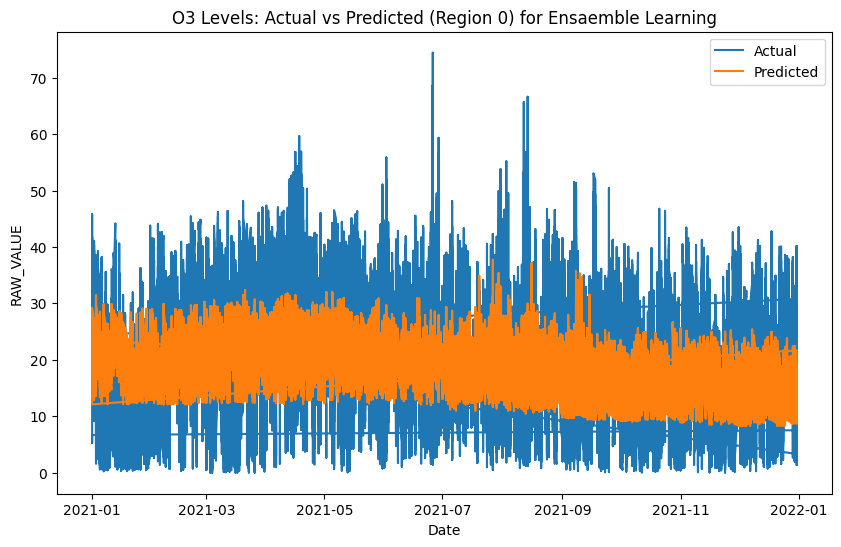

In [66]:
# Filter the DataFrame for region = 0 with ensemble method
O3_test['PREDICTED_RAW_VALUE'] = y_pred_ensemble
region_0_data = O3_test[O3_test['REGION'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(region_0_data['DATE'], region_0_data['RAW_VALUE'], label='Actual')
plt.plot(region_0_data['DATE'], region_0_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title('O3 Levels: Actual vs Predicted (Region 0) for Ensaemble Learning')
plt.legend()
plt.show()

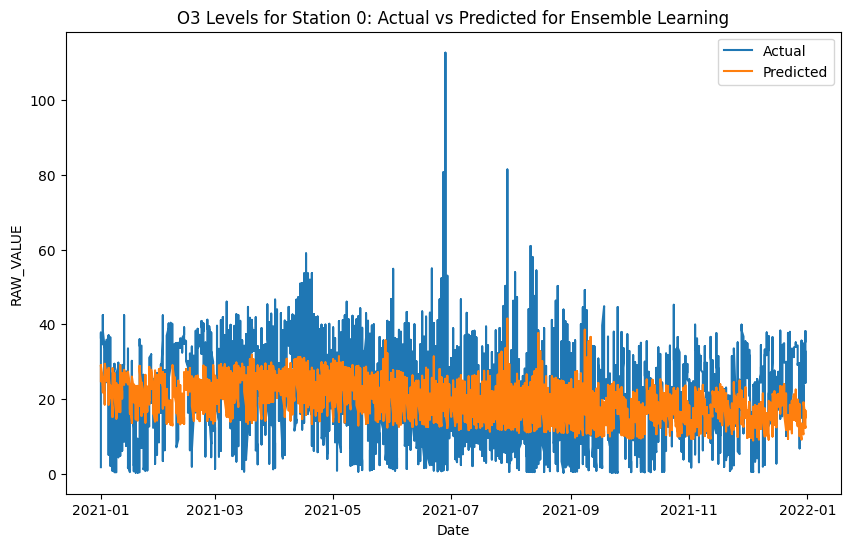

In [67]:
# Filter data for station with name 0 with ensemble method
O3_test['PREDICTED_RAW_VALUE'] = y_pred_ensemble
filtered_data = O3_test[O3_test['STATION_NAME'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['DATE'], filtered_data['RAW_VALUE'], label='Actual')
plt.plot(filtered_data['DATE'], filtered_data['PREDICTED_RAW_VALUE'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('RAW_VALUE')
plt.title(f'O3 Levels for Station 0: Actual vs Predicted for Ensemble Learning')
plt.legend()
plt.show()